# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 9.5 MB/s eta 0:00:0000:01m00:01
Note: you may need to restart the kernel to use updated packages.


### Install Dependencies

In [6]:
%pip install numpy
%pip install pandas
%pip install plotly
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 14.1 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 8.4 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━

### Import Statements

In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [9]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [14]:
shape = df_data.shape
print("The data has {} rows and {} columns.".format(shape[0], shape[1]))
print("The column names aer: {}".format(", ".join(df_data.columns)))

df_data.isna().values.any() # True
df_data.duplicated().values.any() # False

The data has 4324 rows and 9 columns.
The column names aer: Unnamed: 0.1, Unnamed: 0, Organisation, Location, Date, Detail, Rocket_Status, Price, Mission_Status


False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [18]:
df_data.dropna(inplace=True) 
df_data.isna().values.any() # False

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
3855,3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success
4020,4020,4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure


In [29]:
duplicates = df_data.duplicated(subset=["Location", "Date", "Detail", "Price", "Organisation"])
df_data.drop_duplicates(subset=["Location", "Date", "Detail", "Price", "Organisation"], inplace=True)

In [40]:
(df_data["Unnamed: 0"] == df_data["Unnamed: 0.1"]).values.sum()
df_data.drop(columns=["Unnamed: 0.1"], inplace=True) # The columns are identical

In [44]:
(df_data["Unnamed: 0"] == df_data.index).values.sum()
df_data.drop(columns=["Unnamed: 0"], inplace=True) # The columns are identical

## Descriptive Statistics

In [46]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,963,963,963,963,963,963,963
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",H-IIA 202 | IGS-Radar 5,StatusActive,450.0,Success
freq,157,120,1,2,585,136,909


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

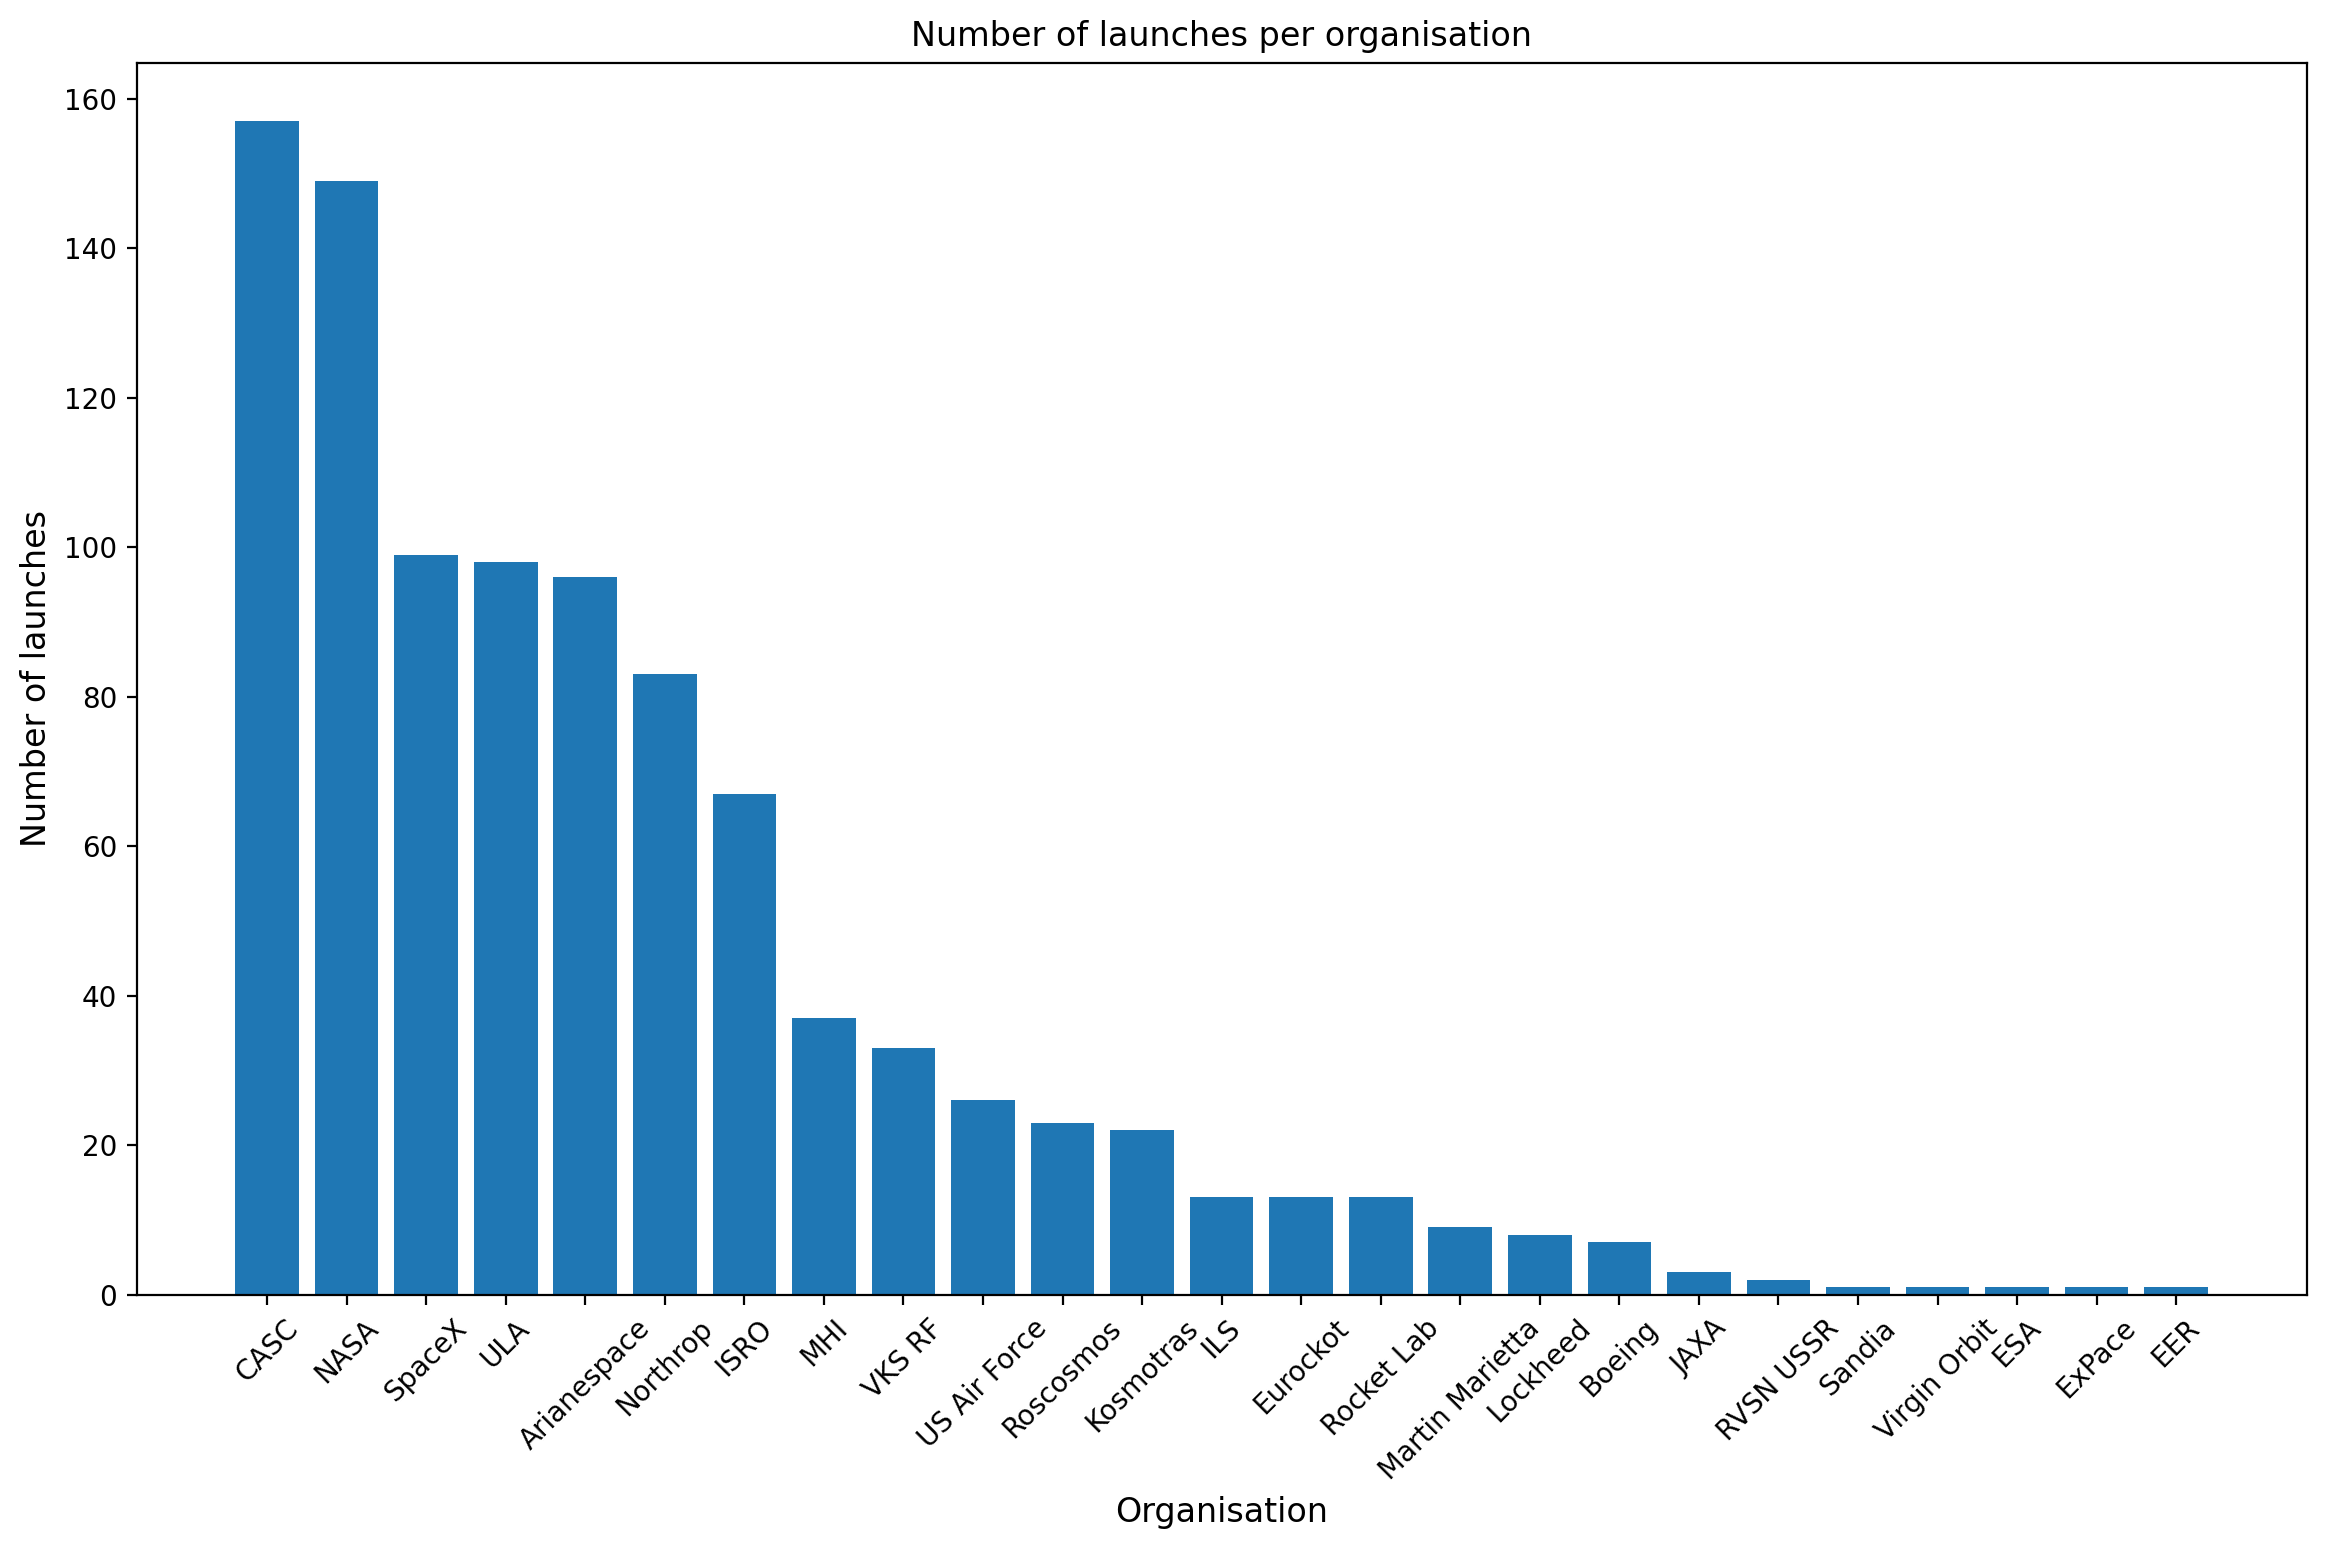

In [59]:
org_counts = df_data["Organisation"].value_counts()

plt.figure(figsize=(14, 8), dpi=200)
plt.title("Number of launches per organisation")
plt.xlabel("Organisation", fontsize=12)
plt.ylabel("Number of launches", fontsize=12)
plt.xticks(rotation=45)

plt.bar(x=org_counts.index, height=org_counts.values)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [63]:
# Data CLeaning
df_data["Rocket_Status"].value_counts()
df_data["Rocket_Status"] = df_data["Rocket_Status"].replace({"StatusRetired": "Retired", "StatusActive": "Active"})

([<matplotlib.patches.Wedge at 0x16e556820>,
 [Text(-1.0378901119814745, -0.3643955480670457, 'Active'),
  Text(1.0378900778642965, 0.36439564524132884, 'Retired')],
 [Text(-0.5661218792626224, -0.19876120803657035, '60.7%'),
  Text(0.5661218606532527, 0.1987612610407248, '39.3%')])

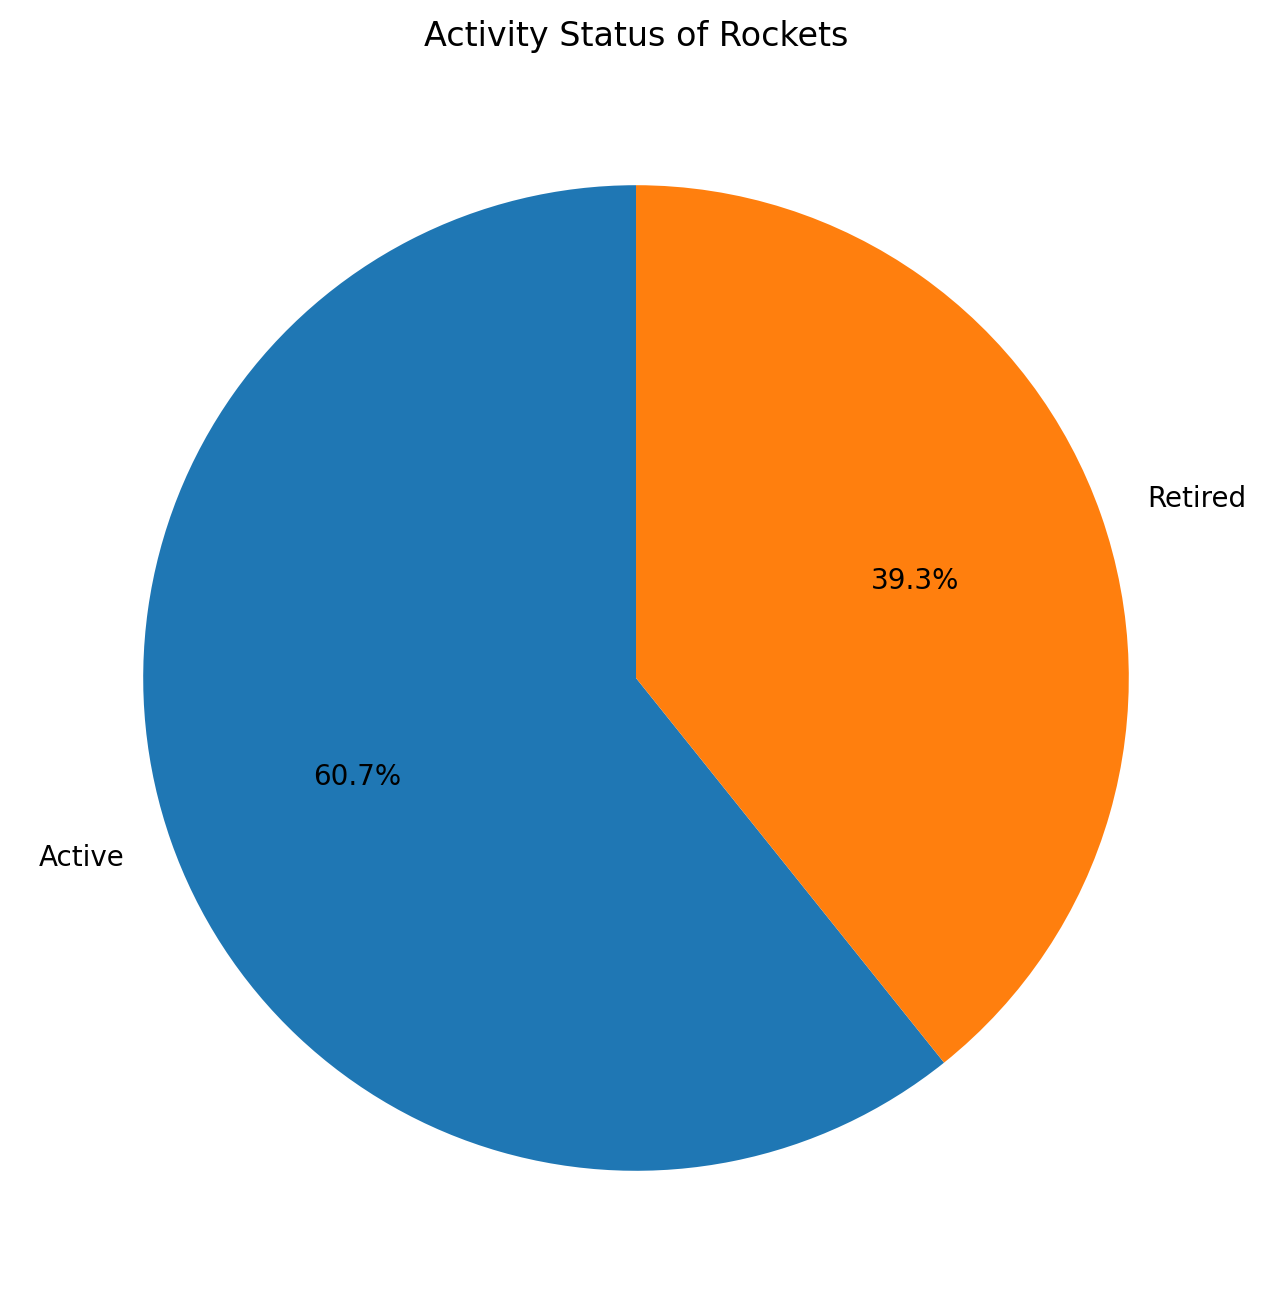

In [67]:
# Pie Chart
activity_counts = df_data["Rocket_Status"].value_counts()
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Activity Status of Rockets")
plt.pie(x=activity_counts.values, labels=activity_counts.index, autopct='%1.1f%%', startangle=90)

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

([<matplotlib.patches.Wedge at 0x16e1cffa0>,
 [Text(-0.19277965059840393, -1.082975533571815, 'Success'),
  Text(0.25600453826550956, 1.0697951562740708, 'Failure'),
  Text(0.06813818652985226, 1.0978876024149389, 'Partial Failure'),
  Text(0.0035883361652265483, 1.09999414718605, 'Prelaunch Failure')],
 [Text(-0.1051525366900385, -0.5907139274028081, '94.4%'),
  Text(0.1396388390539143, 0.5835246306949476, '3.7%'),
  Text(0.037166283561737595, 0.5988477831354212, '1.8%'),
  Text(0.001957274271941753, 0.5999968075560272, '0.1%')])

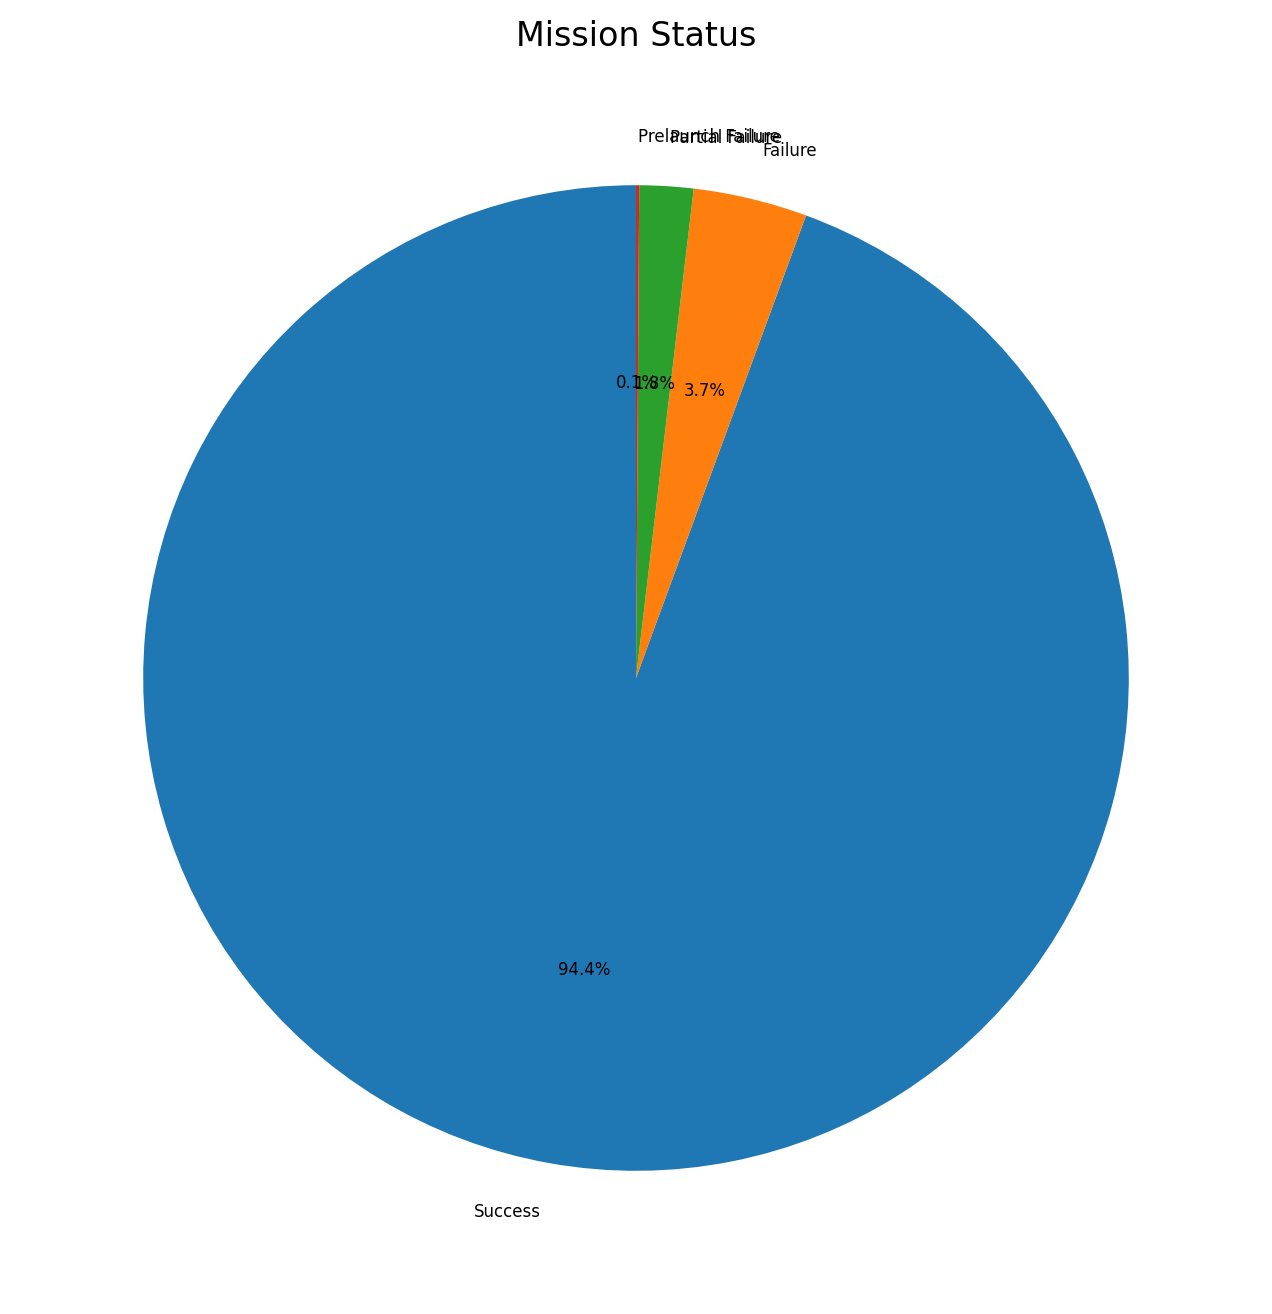

In [73]:
# Pie Chart
mission_status_counts = df_data["Mission_Status"].value_counts()
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Mission Status")
plt.pie(
    x=mission_status_counts.values, 
    labels=mission_status_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'fontsize': 6})

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 